![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
!pip install plotly
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

You should consider upgrading via the 'c:\users\joser\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [33]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [34]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

Estadisticas descriptivas de la variable workingday:

In [35]:
estadisticas=bikes['workingday'].describe()
print(estadisticas)

count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64


En total se tienen 10886 registros, para los cuales se puede apreciar su distribución en el grafico de histograma que se presenta a continuación, donde el 68% de los registros pertenecen a la clase 1 que representa los dias entre semana no festivos.

In [36]:
fig = px.histogram(bikes, x=bikes["workingday"], title='Histograma para la variable workingday')
fig.show()

In [37]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Estadisticas descriptivas de la variable hour:

In [38]:
estadisticas=bikes['hour'].describe()
print(estadisticas)

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64


La primera observación es que se tienen la misma cantidad de registros que para la variable workingday (10886) y con ayuda del histograma podemos apreciar que la distribución es muy similar en las diferentes horas del dia, con su punto mas bajo en la hora 3.

In [39]:
fig = px.histogram(bikes, x=bikes["hour"], title='Histograma para la variable hour')
fig.show()

Para finalizar vamos a verificar la cantidad de datos null que tenga la base bike:

In [40]:
print(bikes.isna().sum())

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
total         0
hour          0
dtype: int64


Se logra apreciar que ninguna columna cuenta con datos null.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

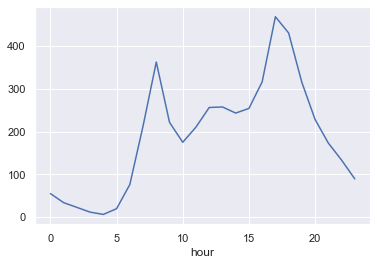

In [41]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

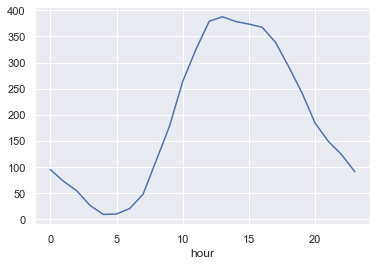

In [42]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos
workingday_0=bikes.loc[bikes['workingday'] == 0]
workingday_0.groupby('hour').total.mean().plot()

Al filtrar teniendo en cuenta la clase 0 (fines de semana y festivos) se puede desarrollar un mejor analisis de la situación y con la grafica podemos apreciar como aumenta el alquiler de bicicletas desde las 9 alcanzando su pico maximo a la hora 13.

<AxesSubplot:xlabel='hour'>

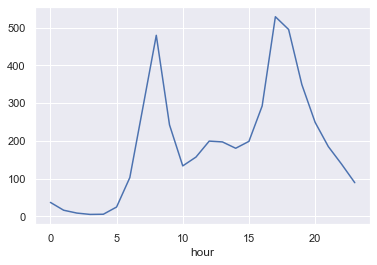

In [43]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
workingday_1=bikes.loc[bikes['workingday'] == 1]
workingday_1.groupby('hour').total.mean().plot()

El mismo caso ocurre cuando solo filtramos la clase 1 de workingday (fines de semana y festivos), es mas facil analizar la información y apreciar que se tienen dos picos maximos, uno a las 8 horas y el segundo a las 17 horas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

Matriz de correlación


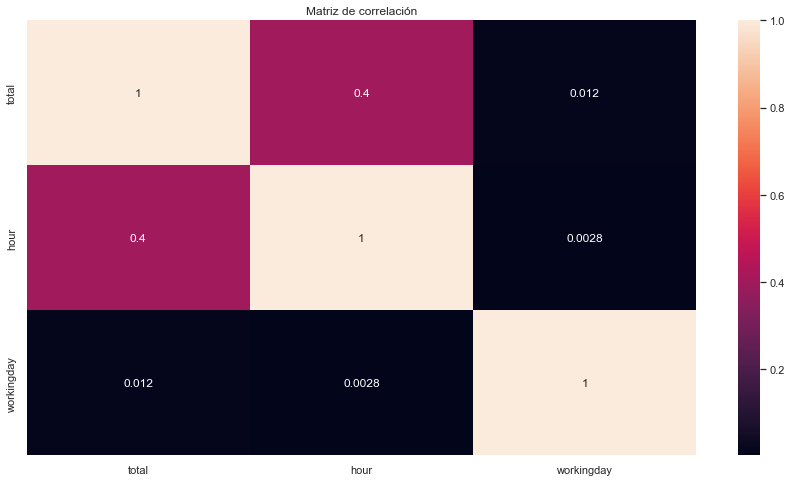

Regresión lineal
Intercept: 67.70595026191575
Coeficiente: [('hour', 10.492062822893763), ('workingday', 4.072486272904376)]
Coeficiente de determinación R^2: 0.16059115011434855


In [44]:
# Celda 3
y=bikes['total']
x=bikes[['hour','workingday']]
data=bikes[['total','hour','workingday']]

print('Matriz de correlación')
correlacion = data.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(correlacion, annot = True)
plt.title("Matriz de correlación")
plt.show()

print('Regresión lineal')
modelo = LinearRegression().fit(x, y)
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(x.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(x, y))

Con el intercepto y los coeficientes de cada variable se puede formar la ecuación del modelo de regresión lineal.
Las limitaciones se pueden apreciar por medio del coeficiente de determinación R^2, el cual entre mas cercano este a 1 se considera un ajuste lineal mas perfecto, para este modelo nos dio de 0.1605, por lo cual nuestros datos no se ajustan muy bien. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Mejor r2 y su correspondiente max_depth:
(0.6501337581022684, 8)
max_depth=8 fue el mejor, se ajusta un árbol usando este valor 


DecisionTreeRegressor(max_depth=8, random_state=1)

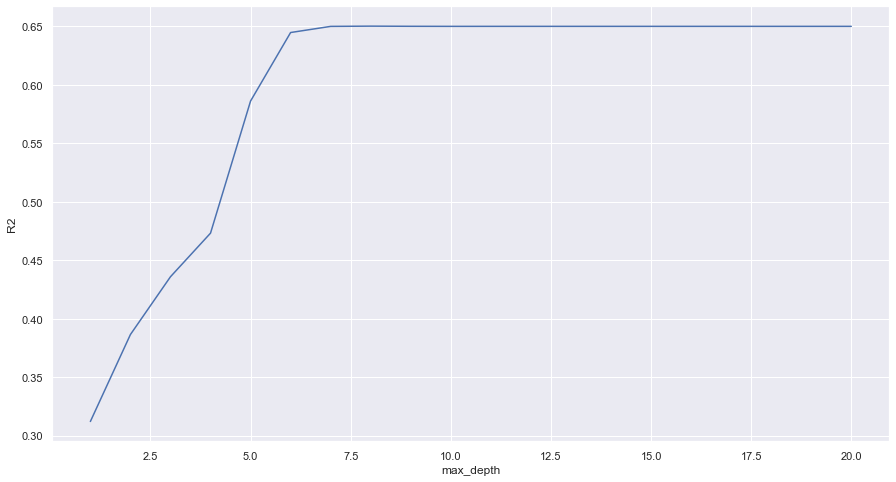

In [49]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Partición en datos de entrenamiento y de prueba
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=0)

# Lista para guardar los valores del R2 para cada valor de máxima profundidad (max_depth)
R2=[]

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    R2.append(cross_val_score(clf, xTrain, yTrain, cv=10, scoring='r2').mean())

# Gráfica max_depth versus R2
plt.plot(max_depth_range, R2)
plt.xlabel('max_depth')
plt.ylabel('R2')

print('Mejor r2 y su correspondiente max_depth:')
print(sorted(zip(R2, max_depth_range))[::-1][0])

print('max_depth=8 fue el mejor, se ajusta un árbol usando este valor ')
clf = DecisionTreeRegressor(max_depth=8, random_state=1)
clf.fit(x, y)

Se realizo el proceso de iteración para entender cual es el mejor R2 cambiando la maxima profundidad, para lo cual se obtuvo que se presentaba con una profundidad de 8.

-------------------------------- Comparación de Modelos por R2 --------------------------------------


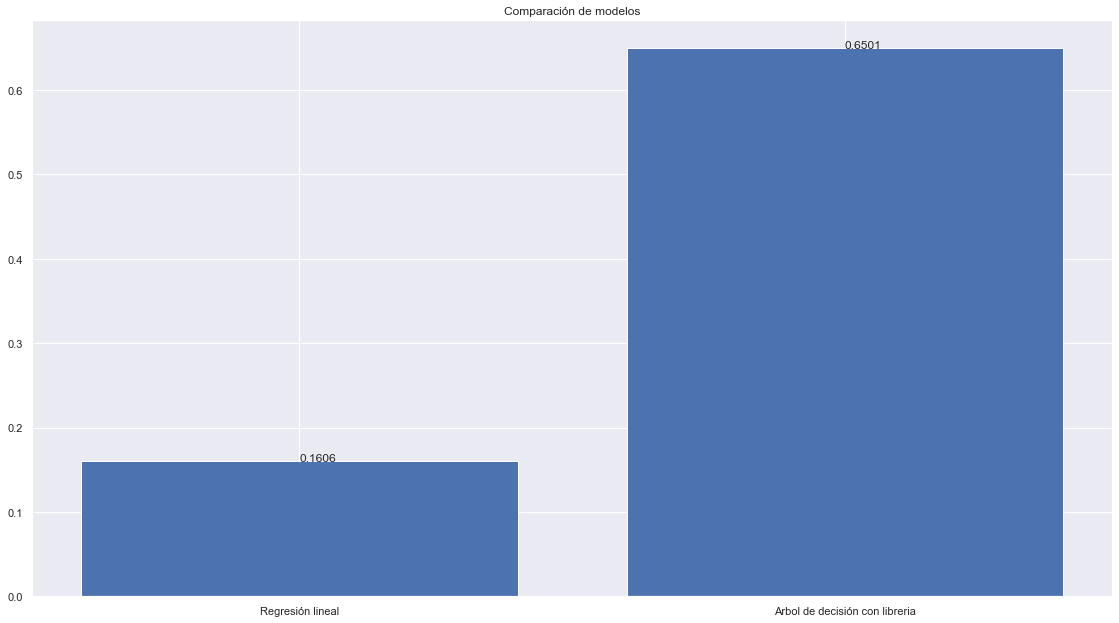

In [50]:
#Comparacion de modelos
print('-------------------------------- Comparación de Modelos por R2 --------------------------------------')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Regresión lineal','Arbol de decisión con libreria']
ejeY = [round(0.16059115011434855,4),round(0.6501337581022684,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Al comparar los modelos se observa una gran diferencia, certificando lo que habiamos concluido que el modelo de regresión lineal no era el mas apropiado, y que para este caso el arbol de decisión se ajusta mucho mejor.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [51]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [52]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [53]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

(0.6308888888888888, 2)

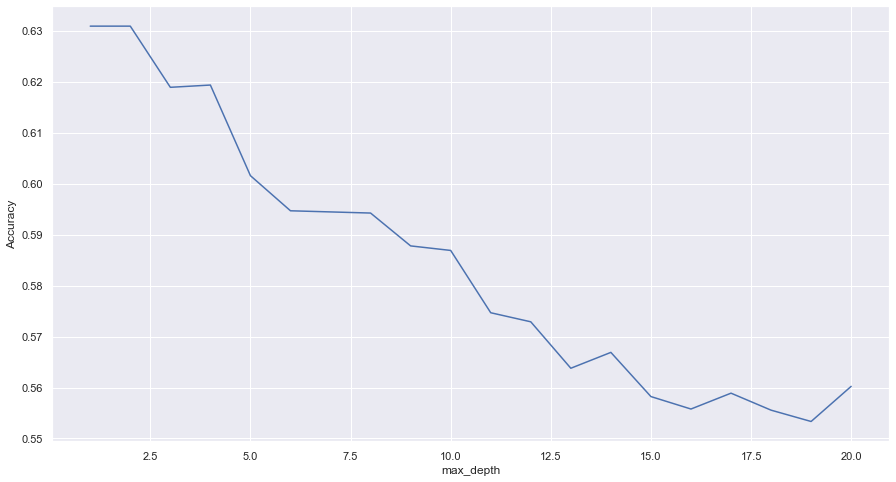

In [54]:
# Celda 6
# Arbol de decisión

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [55]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
arbol_ajustado = DecisionTreeClassifier(max_depth=2, random_state=1)
arbol_ajustado.fit(X_train, y_train)
yPred_arbol_ajustado = arbol_ajustado.predict(X_test)

In [59]:
print('Accuracy arbol de decisión')
metrics.accuracy_score(y_test, yPred_arbol_ajustado)

Accuracy arbol de decisión


0.6453333333333333

In [63]:
print('F1-Score arbol de decisión')
metrics.f1_score(y_test, yPred_arbol_ajustado)

F1-Score arbol de decisión


0.6448598130841121

In [64]:
# Regresión logistica
regresion_logistica = LogisticRegression(random_state=0).fit(X_train, y_train)
yPred_regresion_logistica = regresion_logistica.predict(X_test)

print('Accuracy regresión logistica')
metrics.accuracy_score(y_test, yPred_regresion_logistica)

Accuracy regresión logistica


0.6133333333333333

In [65]:
print('F1-Score regresión logistica')
metrics.f1_score(y_test, yPred_regresion_logistica)

F1-Score regresión logistica


0.6102150537634409

Al comparar ambas metricas en los modelos de Arbol de decisión y Regresión logistica se evidencia una pequeña mejora en el primero, por esta razón es el que mejor se ajusta.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9